# WELL NOTEBOOK
## Well logs visualization &amp; petrophysics

Install the the repository reservoirpy from github and import the required packages

In [40]:
import os
path = os.path.abspath(os.path.join('..','..','..'))
import sys
sys.path.append(path)
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
from pyproj import Proj, transform, CRS, Transformer

from reservoirpy.wellpy import path as ph


### Well atributes

Well atributes, name, rte, coordinates, survey

In [41]:
deviation = pd.read_csv('survey.csv', header=[0])

In [79]:
tops1 = ph.tops({'formation':['fm1','fm2'],'md_top':[5000,5100],'md_bottom':[5099,5145]})
tops1

,md_top,md_bottom
formation,,
fm1,5000,5099
fm2,5100,5145


In [80]:
#Create the well object
name1 = 'well-1'
rte1 = 515.78 # Rotary table Elevation
surf_coord1 = [1000000,1000000]#Point(1000100,1000000,520)
crs1 = 'EPSG:3117'
tops1 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation1 = deviation.copy()
deviation1['azi'] = deviation1['azi'] + 0

w1 = ph.well(name=name1, 
             rte=rte1, 
             surf_coord=surf_coord1, 
             survey = deviation1,
             tops=tops1,
             crs=crs1)


#Create the well object
name2 = 'well-2'
rte2 = 515 # Rotary table Elevation
surf_coord2 = Point(1000100,1000000,500)
crs2 = 'EPSG:3117'
tops2 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation2 = deviation.copy()
deviation2['azi'] = deviation1['azi'] + 0

w2 = ph.well(name=name2, 
             rte=rte2, 
             surf_coord=surf_coord2,
             survey = deviation2,
             tops=tops2,
             crs=crs2)


#Create the well object
name3 = 'well-3'
rte3 = 515 # Rotary table Elevation
surf_coord3 = Point(1000500,1000000)
crs3 = 'EPSG:3117'
tops3 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation3 = deviation.copy()
deviation3['azi'] = deviation1['azi'] + 30

w3 = ph.well(name=name3, 
             rte=rte3, 
             surf_coord=surf_coord3,
             survey = deviation3,
             tops=tops3,
             crs=crs3)

In [81]:
w3.surf_coord.x

1000500.0

## Create an empty wells group

In [82]:
g1 = ph.wells_group(w1)

In [83]:
g1.wells

{'well-1': <reservoirpy.wellpy.path.wells.well at 0x7f7ea9f7aad0>}

In [84]:
g1.add_well(w2,w3)
g1.wells

{'well-1': <reservoirpy.wellpy.path.wells.well at 0x7f7ea9f7aad0>,
 'well-2': <reservoirpy.wellpy.path.wells.well at 0x7f7ea9d83c90>,
 'well-3': <reservoirpy.wellpy.path.wells.well at 0x7f7eaa099590>}

In [85]:
g1.wells['well-3'].surf_coord.wkt

'POINT (1000500 1000000)'

In [86]:
dist = g1.wells_distance(z=False)
dist

,well-1,well-2,well-3
well-1,0.0,100.0,500.0
well-2,100.0,0.0,400.0
well-3,500.0,400.0,0.0


In [87]:
m = g1.wells_map(zoom=20)
m

In [88]:
g1.formation_distance(formation='fm2')

well,well-1,well-2,well-3
well,,,
well-1,0.000000,100.000283,286.164646
well-2,100.000283,0.000000,191.221564
well-3,286.164646,191.221564,0.000000


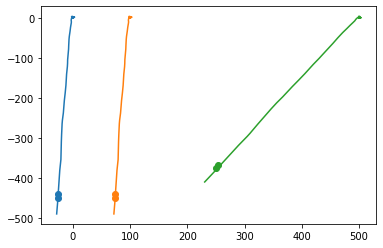

In [89]:
fig, ax = plt.subplots()

for i in g1.wells:
    _t = g1.wells[i].tops
    _s = g1.wells[i].survey
    ax.scatter(_t['easting']-1000000,_t['northing']-1000000)
    ax.plot(_s['easting']-1000000,_s['northing']-1000000)